In [1]:
import os
import json

import math

from tabulate import tabulate

import plot_helper as plot_helper

from dotenv import load_dotenv
load_dotenv()

streamer = os.environ.get("TWITCH_STREAMER")
print(streamer)
with open(f"data/{streamer}.json") as f:
    predictionEvents = json.load(f)
predictionEvents.reverse()


crazzyccat


In [2]:
idUsernameDict = {}
usernameIdDict = {}
idPointsGainDict = {}
idPointsLossDict = {}
idNumA = {}
idNumB = {}
idNumC = {}
idNumD = {}

for predictionEvent in predictionEvents:
    title = predictionEvent["title"]
    date = predictionEvent["endedAt"]
    outcomes = predictionEvent["outcomes"]
    win_outcome = outcomes[0]
    los_outcome = outcomes[1]
    win_tp = win_outcome["totalPoints"]+1
    los_tp = los_outcome["totalPoints"]+1
    win_tu = win_outcome["totalUsers"]
    los_tu = los_outcome["totalUsers"]
    is_win = predictionEvent["winningOutcome"]["id"] == outcomes[0]["id"]
    prediction_window = predictionEvent["predictionWindowSeconds"]

    for predictor in win_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * los_tp / win_tp)
        predictor_delta = predictor_payout if is_win else predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]

        idUsernameDict[userid] = usernm
        usernameIdDict[usernm] = userid
        if is_win:
            idPointsGainDict[userid] = idPointsGainDict.get(userid, 0) + predictor_payout
        else:
            idPointsLossDict[userid] = idPointsLossDict.get(userid, 0) + predictor_bet
        if win_tp >= los_tp:
            idNumA[userid] = idNumA.get(userid, 0) + 1
        else:
            idNumB[userid] = idNumB.get(userid, 0) + 1

    for predictor in los_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * win_tp / los_tp)
        predictor_delta = predictor_payout if not is_win else predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]

        idUsernameDict[userid] = usernm
        usernameIdDict[usernm] = userid
        if not is_win:
            idPointsGainDict[userid] = idPointsGainDict.get(userid, 0) + predictor_payout
        else:
            idPointsLossDict[userid] = idPointsLossDict.get(userid, 0) + predictor_bet
        if not win_tp >= los_tp:
            idNumC[userid] = idNumC.get(userid, 0) + 1
        else:
            idNumD[userid] = idNumD.get(userid, 0) + 1

users = []
for userid in idUsernameDict.keys():
    user = {
        "total": idPointsGainDict.get(userid, 0)-idPointsLossDict.get(userid, 0),
        "gain": idPointsGainDict.get(userid, 0),
        "loss": idPointsLossDict.get(userid, 0),
        "a": idNumA.get(userid, 0),
        "b": idNumB.get(userid, 0),
        "c": idNumC.get(userid, 0),
        "d": idNumD.get(userid, 0),
        "userid": userid,
        "numbets": idNumA.get(userid, 0) + idNumB.get(userid, 0) + idNumC.get(userid, 0) + idNumD.get(userid, 0),
        "username": idUsernameDict.get(userid, 0)
    }
    users.append(user)

users.sort(reverse=True, key=lambda u: u["total"])
# users.sort(reverse=True, key=lambda u: u["numbets"])

users = users[:30]

print(tabulate(users, headers="keys"))



   total      gain      loss    a    b    c    d     userid    numbets  username
--------  --------  --------  ---  ---  ---  ---  ---------  ---------  --------------------
10434385  38077502  27643117   97  165  124  632  257775320       1018  천만포인트_나노라모
 7313817  31570761  24256944  164   57  106  158  400363358        485  15일차세이팬
 4478861  12968924   8490063   60   24   16   30  119510664        130  혀니쓰
 2743136   8253914   5510778   37   21   27   79  274668204        164  으뇽님
 2685634  14043965  11358331   40   15   20   29  514194128        104  히퍼크릿
 2160972   3485972   1325000   15    6    5    4  409403672         30  한번만바줘
 2084268   5178653   3094385   39    7    2    5  246037252         53  HeMeets
 1950078   9265078   7315000   94   49   61  157  147182387        361  프릭퀀스
 1888782   2944124   1055342    9    8    2    8  137917253         27  소와나무치즈
 1751772   3001772   1250000   13    3    4    1  160384973         21  humdrumjinx1541
 1714320   3514320   1800000   1

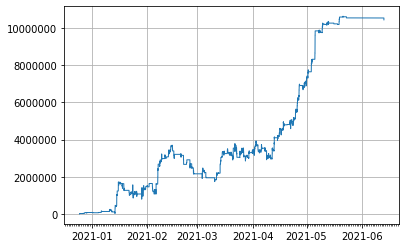

In [3]:
name = "천만포인트_나노라모"
myid = usernameIdDict[name]

gain = 0
data = []

for predictionEvent in predictionEvents:
    title = predictionEvent["title"]
    date = predictionEvent["endedAt"]
    outcomes = predictionEvent["outcomes"]
    win_outcome = outcomes[0]
    los_outcome = outcomes[1]
    win_tp = win_outcome["totalPoints"]+1
    los_tp = los_outcome["totalPoints"]+1
    win_tu = win_outcome["totalUsers"]
    los_tu = los_outcome["totalUsers"]
    is_win = predictionEvent["winningOutcome"]["id"] == outcomes[0]["id"]
    prediction_window = predictionEvent["predictionWindowSeconds"]

    for predictor in win_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * los_tp / win_tp)
        predictor_delta = predictor_payout if is_win else -predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]

        if userid == myid:
            data.append([date, gain])
            gain += predictor_delta
            data.append([date, gain])

    for predictor in los_outcome["topPredictors"]:
        predictor_bet = predictor["points"]
        predictor_payout = math.floor(predictor_bet * win_tp / los_tp)
        predictor_delta = predictor_payout if not is_win else -predictor_bet
        if not predictor["user"]: continue
        userid = predictor["user"]["id"]
        usernm = predictor["user"]["displayName"]

        if userid == myid:
            data.append([date, gain])
            gain += predictor_delta
            data.append([date, gain])

plot_helper.plot_datetimes_vs_value(data, xlim=False)
